# **Final Project: Bike Ridership**
**Team Members**: Asia Qin, Cindy Liu, Alisha Sampat, Samantha Belzer \
DIDA 325: Data and Society


# Introduction

We are a team of analysts working for Washington, DC’s District Department of Transportation (DDOT) to identify how weather patterns affect bike ridership. We are looking at historical usage data to forecast bike rental demand in the Capital Bikeshare program. Analyzing this data allows the DDOT to gain a better understanding of Washington, DC’s mobility and how to introduce more efficient bike sharing systems to improve user satisfaction and increase the amount of annual tourists. For instance, by understanding bike ridership traffic, the DDOT can then know when and where to prioritize maintenance efforts on bikes in the summer at tourist locations or which locations to store bikes away in the winter when it is cold. Our goal is to gain a better understanding of features that may impact the rate at which bikes are rented in order to develop a more efficient system for all bike users with an emphasis on increasing the number of registered bike users.

The dataset is provided by [Washington, DC’s Capital Bikeshare data](https://github.com/asia8p/DIDA-325-Final.git) which is a bicycle sharing service that operates Washington, DC. Capital Bikeshare recorded anonymized bike trip information from 2011 to 2012. This dataset combined trip information such as, date, year, season, and the user type. The dataset also merges Capital Bikeshare's information with the weather patterns of each rider’s bike trip, where each bikeshare user is classified as either registered or casual to determine how often they utilize this system. Having both rider and weather information can help us as analysts identify reoccuring patterns and determine the correlation they share. This will allow us to give reliable recommendations on how to increase the number of users and improve upon services to Washington DC's Department of Transportation, specifically for their Capital Bikeshare.

We plan on achieving this through exploring our four research questions:

**Research Question 1:** Are registered users more likely to ride in “bad” weather (3of weathersit) compared to casual riders?

**Research Question 2:** Does the month (mnth) affect the rate at which casual users and registered users rent bikes (casual and registered)?

**Research Question 3:** How can we accurately predict the number of registered bikers based on weather conditions (weathersit, temp, atemp, hum, windspeed)?

**Research Question 4:** How can we accurately predict the total number of bikes rented based the time of year (year, month, holiday?)

# Dataset

This dataset contains bike rental activity ranging from 2011 to 2012. Each row of this dataset represents a different day within this time frame and includes information about the weather, day of the week, and how many total registered and total casual users rented a bike that day. Some notable columns from this dataset are "dteday", "year", "mnth", "holiday", "weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", and "cnt". The first column listed gives us the exact day we are focusing on in that particular row. The next three columns listed give us additional information about the day itself. This consists of what year it is, the month, and if that particular day is a holiday or not. These three variables are categorical to represent the information in a more concise way. The next five variables listed all give data on the type of weather conditions and temperature experienced during that particular day. This is valuable data as weather can impact whether or not someone decides to rent a bike that day. Lastly, the following three columns listed contain information on the total amount of users for the day and it is separated based on registered and casual users. Registered users pay a yearly membership fee in exchange for unlimited bike rental, whereas casual users are people who rent the bike for a one-time-fee. The goal with analyzing how different factors during the day impact the number of registered or casual users is to ultimately come up with methods to increase more registered users so they sign up for the membership and are more reliant on the bikeshare system in Washington, DC.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [ ]:
! git clone https://github.com/asia8p/DIDA-325-Final.git

Cloning into 'DIDA-325-Final'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 25.04 KiB | 5.01 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:
bikeshare = pd.read_csv("/content/DIDA-325-Final/day.csv")

In [ ]:
bikeshare.isnull().values.any()

np.False_

In [ ]:
bikeshare.dtypes

,0
instant,int64
dteday,object
season,int64
yr,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64


In [ ]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


There are no null values, so we do not plan on removing any columns from the dataset. All of the datatypes are numeric values, besides dteday, which will be beneficial for our analysis.

# Analysis

# Research Question 1:

As a team of analysts we want to determine how weather conditions impact the amount of riders that would ride in different weather conditions. Focusing specfically on "bad" weather conditions. There are two different types of riders, registered and casual riders. Registered riders commit to an annual membership and are allowed unlimited bike use. Casual riders, rent on a timely basis. We are speculating if the membership inluences more rides in "bad" weather. Are registered users more likely to ride in “bad” weather (3 and 4 of weathersit) compared to casual riders?

In [ ]:
bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
month_bikeshare = bikeshare[[ 'weathersit','casual', 'registered']].sort_values(by= 'weathersit',ascending = True)
month_bikeshare[ 'weathersit'] = month_bikeshare[ 'weathersit']
month_bikeshare.dtypes

month_bikeshare

,weathersit,casual,registered
479,1,518,5115
450,1,795,4763
451,1,531,4571
452,1,674,5024
453,1,834,5299
...,...,...,...
319,3,145,1672
68,3,46,577
89,3,179,1506
324,3,220,2545


In [ ]:
bad = month_bikeshare.loc[month_bikeshare['weathersit'].isin(['3'])]
bad

,weathersit,casual,registered


In [ ]:
good = month_bikeshare.loc[month_bikeshare['weathersit'].isin(['1', '2'])]
good

,weathersit,casual,registered


In [ ]:
riders = 'casual' and 'registered'

While we are focusing on "bad" weather conditions (3 of weathersit), we want to also compare them to relatively "good" conditions (1 and 2 of weathersit) as well. We used a histogram and bargraph of effectively compare how weather conditions impacted the overall amount of riders, registered riders, and casual riders. Below are the graphs for the overall amount of riders.

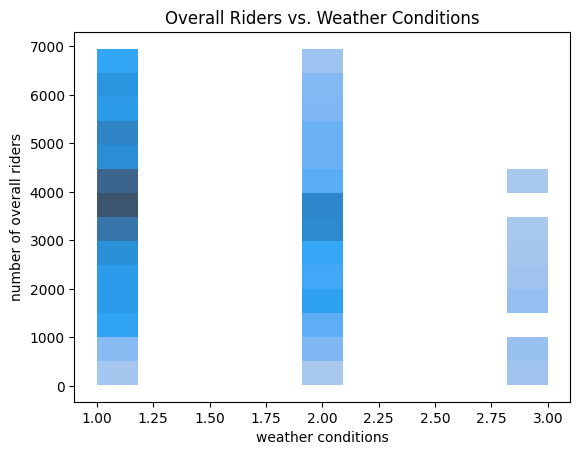

In [ ]:
sns.histplot(bikeshare, x='weathersit', y=riders ,multiple="stack")
plt.xlabel("weather conditions")
plt.ylabel("number of overall riders")
plt.title("Overall Riders vs. Weather Conditions")
plt.show()

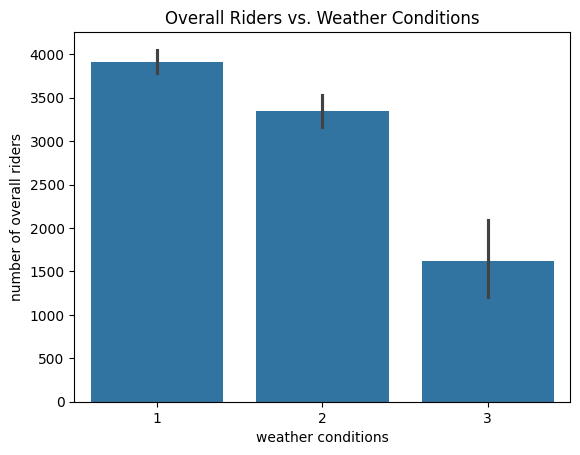

In [ ]:
sns.barplot(bikeshare, x ='weathersit', y = riders)
plt.xlabel("weather conditions")
plt.ylabel("number of overall riders")
plt.title("Overall Riders vs. Weather Conditions")
plt.show()

These are the graphs for just registered riders. They compare very similarly to the overall amount of riders because the amount of registered riders is the majority of overall riders.

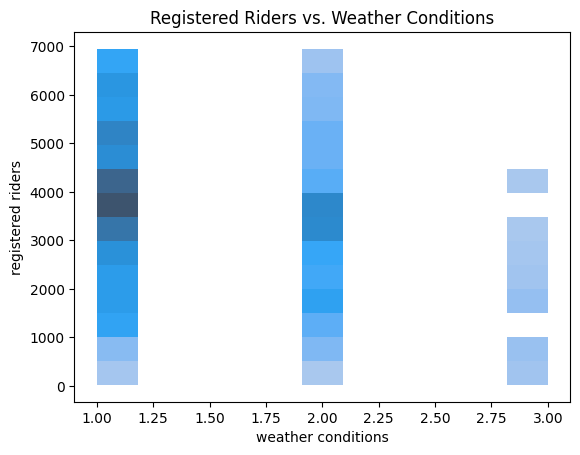

In [ ]:
sns.histplot(bikeshare, x='weathersit', y='registered' ,multiple="stack")
plt.xlabel("weather conditions")
plt.ylabel("registered riders")
plt.title("Registered Riders vs. Weather Conditions")
plt.show()

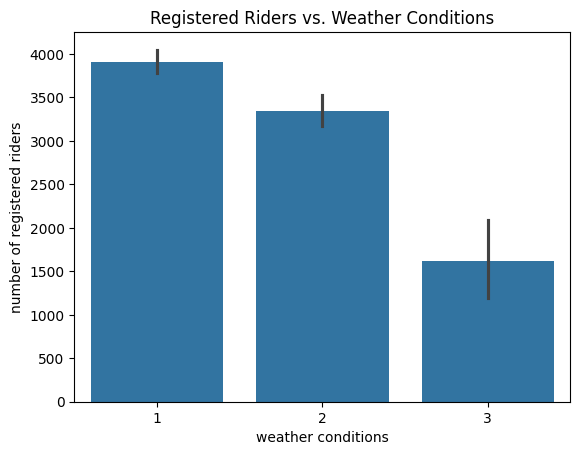

In [ ]:
sns.barplot(bikeshare, x ='weathersit', y = 'registered')
plt.xlabel("weather conditions")
plt.ylabel("number of registered riders")
plt.title("Registered Riders vs. Weather Conditions")
plt.show()

The amount of casual riders is significantly less than the registered riders and it shows through the overall numbers.

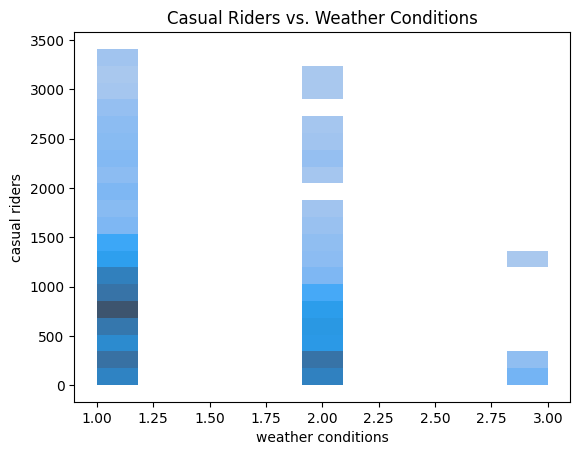

In [ ]:
sns.histplot(bikeshare, x='weathersit', y='casual',multiple="stack")
plt.xlabel("weather conditions")
plt.ylabel("casual riders")
plt.title("Casual Riders vs. Weather Conditions")
plt.show()

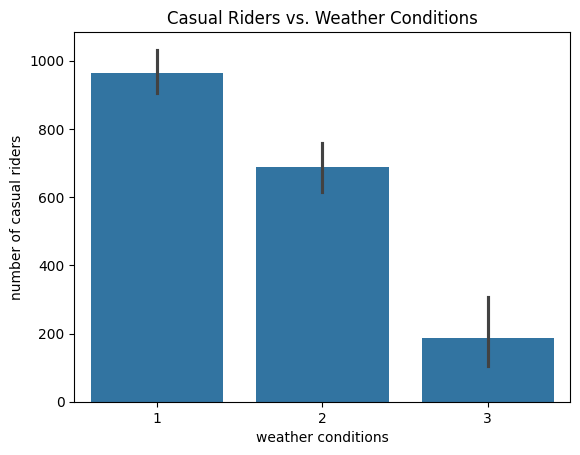

In [ ]:
sns.barplot(bikeshare, x ='weathersit', y = 'casual')
plt.xlabel("weather conditions")
plt.ylabel("number of casual riders")
plt.title("Casual Riders vs. Weather Conditions")
plt.show()

The question is meant to determine how "bad" weather impacted both casual and registered riders. We found that despite the harsher weather conditions there are overall more registered riders compared to casual riders.

# Research Question 2:


As a team of analysts, we want to gain a better understanding of bike user incentives and the factors that may contribute to the increase in bike rentals. By analyzing the time of month, this generalizes the weather, seasons, and holidays that also may factor into the rate at which users use our service and detect some sort of trend. And therefore, it is important to know: does the month (mnth) affect the rate at which casual users and registered users rent bikes (casual and registered)? By acknowledging his question, we are able to analyze the optimal time of month bike riders use our service to understand our customers. In addition, by answering this research question we will also help summarize the fiscal year's performance in 2011 in terms of the rate at which bikes are rented out.
If the month is expected to have colder weather or holidays, then it is expected for bike rentals to be lower than warmer weather. Answering the research question will help confirm whether it is true or not.

Below is table with the needed variables to create the line graph.

In [ ]:
month_bikeshare = bikeshare[['mnth',  'casual', 'registered',"holiday"]].sort_values(by="mnth",ascending = True)
month_bikeshare['mnth'] = month_bikeshare['mnth'].astype(str)
month_bikeshare.dtypes

month_bikeshare

,mnth,casual,registered,holiday
0,1,331,654,0
1,1,131,670,0
2,1,120,1229,0
3,1,108,1454,0
4,1,82,1518,0
...,...,...,...,...
338,12,233,3578,0
337,12,634,2851,0
336,12,706,2908,0
335,12,268,3672,0


By using the previous table, the total users per month and the amount of holidays in the month is manually calculated. Below is a sample of the month of January, and so on and so forth. And a new dataset is created. The asterisk indicated that there is a recorded holiday in the dataset for that month.

In [ ]:
# The total monthly registered and casual users were calculated manually like this (The rest of the calculations are in the draft)

# month_bikeshare_jan = month_bikeshare[(month_bikeshare['mnth'] == "1")]
# month_bikeshare_jan["casual"].sum()

# month_bikeshare_jan = month_bikeshare[(month_bikeshare['mnth'] == "1")]
# month_bikeshare_jan["registered"].sum()

# month_bikeshare_jan = month_bikeshare[(month_bikeshare['mnth'] == "1")]
# month_bikeshare_jan["holiday"].sum()



In [ ]:
month_casual_registered = {'Month':["January*", "February*", "March", "April*", "May*", "June", "July*", "August", "September*", "October*", "November*", "December*"],
                           "Total_casual_users":[12042, 14963, 44444,60802,75285, 73906, 78157, 72039, 70323, 59760, 36603, 21693] ,
                           "Total_registered_users":[122891, 136389,184476,208292,256401,272436,266791,279155,275668,262592,218228,189343],
                           "Total_holiday": [3,2,0,2,2,0,2,0,2,2,4,2]}

month_casual_registered = pd.DataFrame(month_casual_registered)
month_casual_registered

,Month,Total_casual_users,Total_registered_users,Total_holiday
0,January*,12042,122891,3
1,February*,14963,136389,2
2,March,44444,184476,0
3,April*,60802,208292,2
4,May*,75285,256401,2
5,June,73906,272436,0
6,July*,78157,266791,2
7,August,72039,279155,0
8,September*,70323,275668,2
9,October*,59760,262592,2


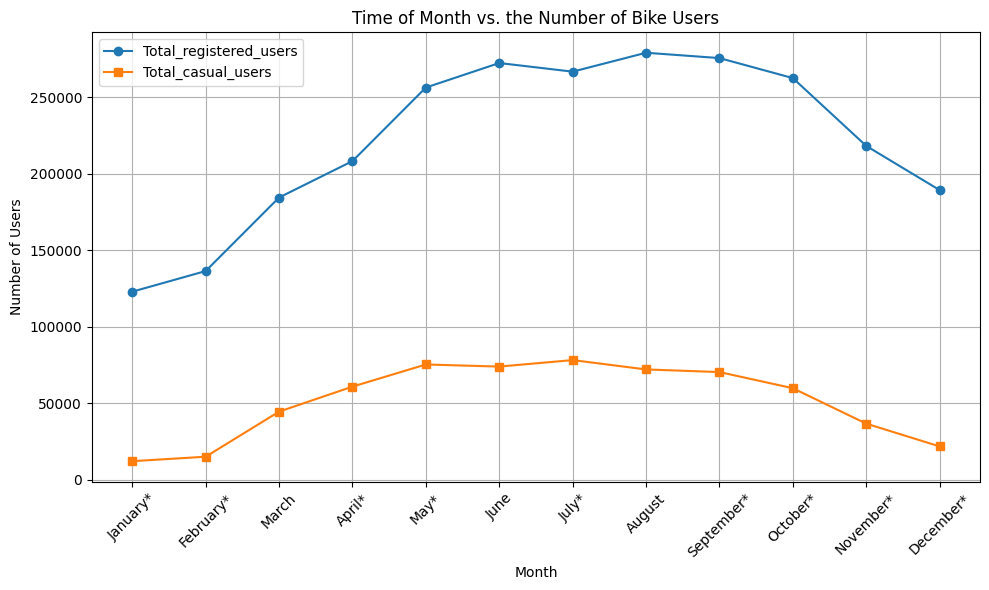

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(month_casual_registered['Month'], month_casual_registered['Total_registered_users'], marker='o', linestyle='-', label='Total_registered_users')
plt.plot(month_casual_registered['Month'], month_casual_registered['Total_casual_users'], marker='s', linestyle='-', label='Total_casual_users')


plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.title('Time of Month vs. the Number of Bike Users')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-53-8e45829d4aa6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(month_casual_registered,x='Month', y='Total_holiday', palette = color)


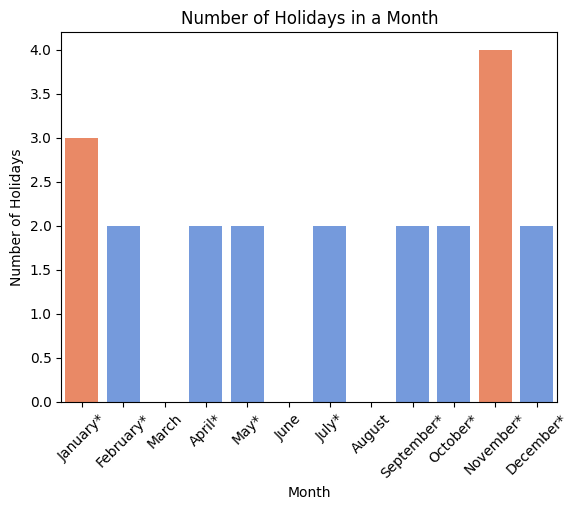

In [ ]:
 color = ["#FF7F50","#6495ED","#6495ED","#6495ED","#6495ED","#6495ED","#6495ED","#6495ED","#6495ED","#6495ED","#FF7F50","#6495ED"]

sns.barplot(month_casual_registered,x='Month', y='Total_holiday', palette = color)
plt.xlabel('Month')
plt.ylabel('Number of Holidays')
plt.title('Number of Holidays in a Month')
plt.xticks(rotation = 45)
plt.show()


Based on the line graph, there is a clear trend in both casual and registered users for the year 2011. The rate at which bikes are rented out are at an all time low during the colder months such as in winter, and are at its acme during the warmer seasons as the temperature gets higher. In addition, summers without holiday months have lower bike rental rates compared to the warmer months with holidays. Overall, the line plot shows a clear trend at depicting the most popular times users rent out bikes. The most ideal time to open up more bike rentals or promote our service would be the transition from colder to warmer seasons where more people can better use our rental service.

# Research Question 3:
Our goal is to ultimately increase the number of registered bikers so that more people purchase a membership program through the DDOT in Washington, DC. We can successfully achieve this by determining the relationship between the number of registered bikers and how likely they are to rent a bike based on weather and temperature conditions. We believe that more intense weather conditions and higher winds will make more people skeptical, and therefore less likely to rent a bike since it would be more difficult to reach their final destination. This leads us to our question of how can we accurately predict the number of registered bikers based on weather conditions using weathersit, temp, atemp, hum, and windspeed? To most, it would make more sense to utilize the bike system in warmer weather where the windspeed is not as high so that bike riding can be most enjoyable and efficient. We plan on exploring how accurate this really is.

In [ ]:
bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
X = bikeshare[['weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = bikeshare['registered']

In [ ]:
X = pd.get_dummies(X, drop_first = True)

In [ ]:
X = sm.tools.tools.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     81.04
Date:                Mon, 05 May 2025   Prob (F-statistic):           1.44e-67
Time:                        21:29:48   Log-Likelihood:                -6249.2
No. Observations:                 731   AIC:                         1.251e+04
Df Residuals:                     725   BIC:                         1.254e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3296.0408    313.489     10.514      0.0

The model explains 35.9% of the variability of registered voters as indicated by the R-squared value. This ultimately tells us that because we do not include many predictors in this model, other factors can have a stronger relation to our y variable which is registered users. Weathersit, hum, and windspeed are all statistically significant predictors in this model since they have a p-value that is less than .05. We are very surprised to see that temp and atemp are not statistically significant to this model since one may think that the temperature can dictate whether or not someone chooses to rent a bike. Based on the coefficients of this model, harsher weather conditions, higher humidity, and higher windspeed all result in the decrease in rider registration which further proves how weather can definitely impact how many people decide to register for a bike that day. However, we can also see that windspeed is the greatest indicator for whether or not to rent a bike since they have the most negative coefficient whereas a higher humidity, for example, results in more people being in favor of biking than when winds are stronger.

Now we will check the residuals for this particular model to see the difference between the actual values and the predictions.

In [ ]:
yhat = model.predict()
residuals = y - yhat

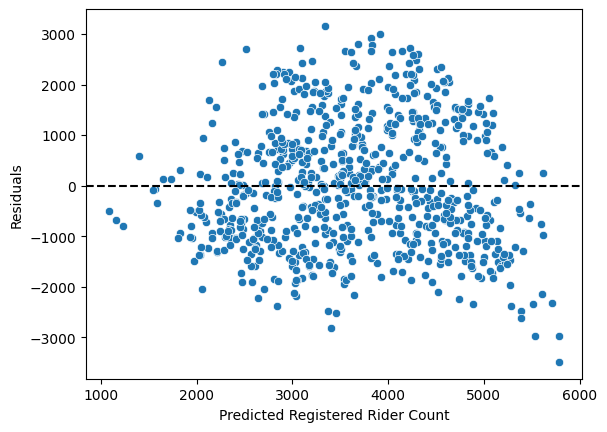

In [ ]:
ax = sns.scatterplot(x = yhat, y = residuals)
ax.axhline(y=0, color="black", linestyle="dashed")
plt.xlabel("Predicted Registered Rider Count")
plt.ylabel("Residuals")
plt.show()

Here we can see that the residuals for this model are more spread a part from one another and not clustered around the y = 0 line which further supports the idea that the model is not constantly accurate and suggests that it contains many outliers.

In [ ]:
np.std(residuals)

1248.7998436072908

This is a very high standard deviation which indicates that the model weakly fits the data we have since it does not accurately capture the relationship between the variables.

Now let's see how the linear regression model will change when we add more predictors to it.

In [ ]:
X = bikeshare[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
y = bikeshare['registered']

In [ ]:
X = pd.get_dummies(X, drop_first = True).astype("float32")

In [ ]:
X = sm.tools.tools.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             registered   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     290.4
Date:                Mon, 05 May 2025   Prob (F-statistic):          7.46e-256
Time:                        21:30:01   Log-Likelihood:                -5792.2
No. Observations:                 731   AIC:                         1.161e+04
Df Residuals:                     719   BIC:                         1.166e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        768.2098    185.551      4.140      0.0

Based on this linear regression model, we can conclude that a much higher variance is explained since the R-squared value is 81.6% which is 45.7% higher than the last model. Therefore, we can conclude that by including more predictors in our regression model that the model is much stronger. All of the variables have statistically significant p-values besides mnth, holiday, and temp. However, mnth is very close to being statistically significant and is not too far off. Temp appears to be the least statistically significant since its p-value is .442 which is much greater than .05, however this is still less than the previous model. This means that temp is not correlated well with registered users, but this may be due to the fact that we included the variable atemp as well. Based on the coefficient of season, we can conclude that as the season changes into warmer weather, which indicates greater values, then the number of registered users increases by about 448. Additionally, it is important to note that atemp, so when it feels warmer, will significantly increase registered voters by about 2,678 users. This further proves our hypothesis that as the weather gets warmer, more people are likely to create a membership and utilize the bike system as their method of transportation around Washington, DC.

Now we will check the residuals for the improved model.

In [ ]:
yhat = model.predict()
residuals = y - yhat

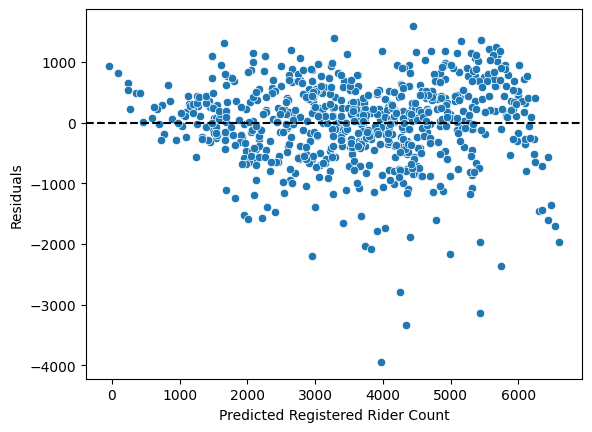

In [ ]:
ax = sns.scatterplot(x = yhat, y = residuals)
ax.axhline(y=0, color="black", linestyle="dashed")
plt.xlabel("Predicted Registered Rider Count")
plt.ylabel("Residuals")
plt.show()

Compared to the earlier residual graph, we can see that the residuals are more concentrated around the y = 0 line which tells us that the data is a more accurate fit. This also tells us that the predictions from the model are relatively close to the true values. This further supports the conclusion from the improved linear regression model that more of the variability is explained through the model since the R-squared value is 81.6% which was much better than the previous one.

In [ ]:
np.std(residuals)

668.3240595918451

Here we see that the standard deviation is about 668.324 which is about half from when the previous standard deviation was calculated. This indicates that there was a significant improvement here especially since the residuals are closer together.

# Research Question 4:
It is safe to assume and expect that there is high ridership during warmer periods of the year such as from April to October which overlap with the spring, summer, and fall seasons. Additionally, there is low ridership on holidays because riders will prioritize celebrating and spending time with loved ones instead. We thus ask this question of how we can accurately predict the total number of bikes rented based on the time of year (using the dataset variables of year, month, holiday) for a few important reasons. The first reason is to improve customer experience because by understanding bike demand patterns, Washington DC’s DDOT can prevent shortages or surpluses. This would reduce wait times and ensure customer satisfaction during high demand periods like holidays or warm months. The second reason is for environmental and social impact because encouraging biking as a transportation mode- particularly during predictable times of high interest- can support environmental goals. These goals for instance are reducing carbon emissions from cars and trains to ultimately promote healthier lifestyles.

In [ ]:
# Identify what columns the dataset has
bikeshare.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# Prepare the data for the full multilinear, regression model
# Determine the predictors and response variables
X = bikeshare[['yr','mnth', 'holiday']]
y = bikeshare['cnt']

X = sm.tools.tools.add_constant(X)

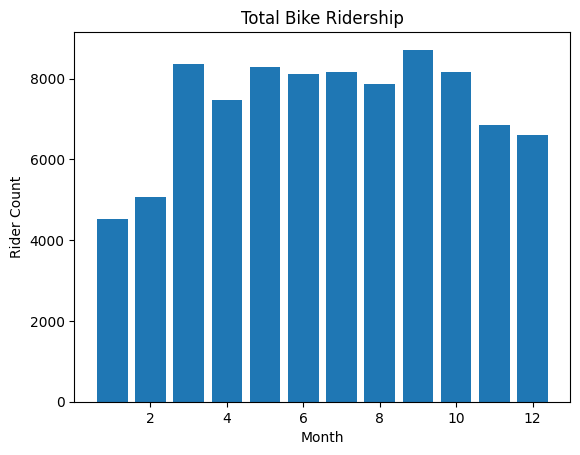

In [ ]:
# Bar plot displaying the total riders per month

x = bikeshare["mnth"]
y = bikeshare['cnt']

plt.bar(x,y)
plt.title('Total Bike Ridership')
plt.xlabel('Month')
plt.ylabel('Rider Count')
plt.show()

The bar plot shows that total ridership is lowest at the beginning of the year in January and Februrary, but March shows a great increase in ridership.

In [ ]:
# Fit a linear model
# Adds a constant column to X dataframe

X = sm.tools.tools.add_constant(X) # Adds intercept to indepedent variable before fitting OLS function

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     165.8
Date:                Mon, 05 May 2025   Prob (F-statistic):           7.00e-82
Time:                        16:02:45   Log-Likelihood:                -6379.2
No. Observations:                 731   AIC:                         1.277e+04
Df Residuals:                     727   BIC:                         1.278e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2395.9997    130.900     18.304      0.0

This summary output from the OLS Regression Results shows that our three predictor variables- year, month, and holiday, are all significant in affecting our response variable of total bike rider count. This is because all of their p-values are less than 0.05. The p-values for year and month are less than 0.001, and the p-value for holiday is 0.006. Because all the predictors are significant, this is the best model with the best predictors.

The coefficients of the predictors enable us to answer our research question. As we increase by one year, the total number of bike riders increases by roughly 2199 riders. As we increase by one month, the total number of bike riders increases by roughly 158 riders. As we have one more holiday, the total number of bike riders decreases by roughly 907 bike riders.

However, the adjusted R-squared is 0.404 which shows that 40.4% of the variability in the y variable is accounted for in the model. This is low compared to the ideal 100%. This shows that the best model we can create to solve the research question, ironically does not perform well. This statement is reinforced by the residuals analysis below.

In [ ]:
# Model evaluation
# Look at residuals of model
# Calculate residuals below

yhat = model.predict()
residuals = y - yhat

Text(0, 0.5, 'Residual')

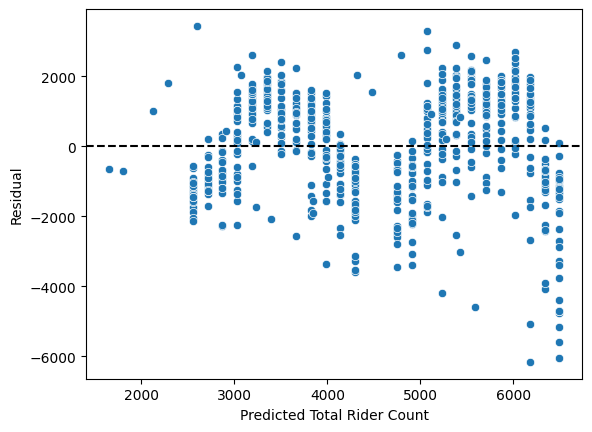

In [ ]:
# Plot the residuals

ax = sns.scatterplot(x=yhat, y=residuals)
ax.axhline(y=0, color='black', linestyle='dashed')

plt.xlabel("Predicted Total Rider Count")
plt.ylabel("Residual")

The above residual vs fits plot shows that for high values of predicted total rider count, the data have a very large spread. There is no constant spread. Our predictions thus do not have a clear accuracy.

In [ ]:
# Typical error size
# Spread on the residuals

np.std(residuals)

1491.7088729045026

Using the standard deviation function on the residuals gets us 1491 total bike rider count, so we're typically plus or minus 1491 riders of the true answer. Typical total bike rider count range from 3000 to 6000, so it's better than just guessing at random.

# Conclusion

As a team of analysts for Washington, DC’s DDOT, we thoroughly investigated all the relevant data included in the DDOT dataset to determine the variables that impact the overall number of bikeshare users. Our investigation included looking at both casual and registered rider numbers as well as weather conditions that could potentially affect the number of riders. There are more registered riders than casual riders which has a significant impact on the data as the results are biased towards the registered riders. While we did show the impact on the overall number of riders, separating into the 2 groups of riders helps us determine what type of impact that weather, month, and time of year had on riders who pay a one-time fee compared to a yearly membership.

Our overall analysis was somewhat effective. The histograms and bar plots for question 1 compare how different categories of “weathersit” impact the numbers of overall, registered and casual riders. The bar plot is the most effective in the representation of the data as it straightforwardly shows clear numbers. Both graphs demonstrated that conditions 1 and 2 of weathersit had more riders compared to condition 3 of weathersit which we defined as “bad” weather. We determined that bad weather impacts the amount of riders, regardless of membership type. While the question compares registered and casual riders, we felt that it was important to include the overall number of riders as well in order to show how the number of registered riders compares to casual when looking at riders as a whole.  The line plot addressing Research Question #2 shows a clear trend at depicting the most popular times users rent out bikes and confirms our preconceived notion that warmer weathers tend to have a higher rate of bike rentals. Overall, the line plot shows a clear trend at depicting the most popular times users rent out bikes and confirms our preconceived notion that warmer weathers tend to have a higher rate of bike rentals, and the line plot displayed a generalization of the timeline of users renting out bikes-both for casual and registered users. Some limitations might consist of finding ways to consider both the month and holiday into one graph for a more concise visualization.

Furthermore, as seen in Research Question #3, we were surprised to see that temperature was not a statistically significant variable for the model which we initially believed would have had a correlation. However, variables related to weather patterns, humidity, and windspeed appear to have a significant impact on the number of registered users. The improved model for this research question was a much more sophisticated approach as it involved additional predictors and increased the R-squared value. Additionally, for Research Question #4, the investigated variables year, month, and holiday used in the full regression model were all significant in predicting the total number of bikes rented. This full model thus translated into the best model for the question. However, evaluating the model’s accuracy demonstrated that this “best” model still does not perform well given a poor residual plot and large error size.

We believe that if given more information on the duration of time people utilized the bikeshare system could have helped us learn more about how long each type of rider typically uses the bike for. This can allow us to draw conclusions on the frequent distance registered and casual riders use the bikes to therefore understand more about each group. We could have also connected the distance in miles and potentially the duration of time in minutes to the weather condition of that particular day and analyzed the correlation between those variables. Other next steps for future analysis include considering more variables from the dataset for Research Question #4 besides the stated three of year, month, and holiday. By considering more predictors such as the time of the day, this could increase the model’s accuracy via the adjusted R-squared and produce a stronger residuals plot. This would therefore allow us to improve bike rider satisfaction for not only registered riders but also increase the number of casual users so we gain a better insight on bike rider patterns.


